In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
import scipy.stats as sts
from scipy.stats import linregress

In [2]:
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results = pd.read_csv(study_results)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
combined_df.dtypes
combined_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [7]:
combined_df.drop_duplicates(inplace = True)
combined_df.count()

Mouse ID              1892
Drug Regimen          1892
Sex                   1892
Age_months            1892
Weight (g)            1892
Timepoint             1892
Tumor Volume (mm3)    1892
Metastatic Sites      1892
dtype: int64

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen = combined_df.groupby("Drug Regimen")

In [9]:
mean_tumor = pd.DataFrame(regimen["Tumor Volume (mm3)"].mean())
mean_tumor

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.368318
Ramicane,40.216745
Stelasyn,54.233149


In [10]:
median_tumor = pd.DataFrame(regimen["Tumor Volume (mm3)"].median())
median_tumor

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.909965
Ramicane,40.673236
Stelasyn,52.431737


In [11]:
std_tumor = pd.DataFrame(regimen["Tumor Volume (mm3)"].std())
std_tumor

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.502160
Ramicane,4.846308
Stelasyn,7.710419


In [12]:
sem_tumor = pd.DataFrame(regimen["Tumor Volume (mm3)"].sem())
sem_tumor

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.514041
Ramicane,0.320955
Stelasyn,0.573111


In [13]:
stat_summary_df = pd.concat([mean_tumor,median_tumor,std_tumor,sem_tumor],axis=1)
stat_summary_df.reset_index()
stat_summary_df.columns=["Mean Tumor Volume", "Median Tumor Volume", "Std Dev Tumor Volume", "SEM Tumor Volume"]
stat_summary_df.round(2)

,Mean Tumor Volume,Median Tumor Volume,Std Dev Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,
Capomulin,40.68,41.56,4.99,0.33
Ceftamin,52.59,51.78,6.27,0.47
Infubinol,52.88,51.82,6.57,0.49
Ketapril,55.24,53.70,8.28,0.60
Naftisol,54.33,52.51,8.13,0.60
Placebo,54.03,52.29,7.82,0.58
Propriva,52.37,50.91,6.50,0.51
Ramicane,40.22,40.67,4.85,0.32
Stelasyn,54.23,52.43,7.71,0.57


Text(0, 0.5, 'Total Data Points Collected')

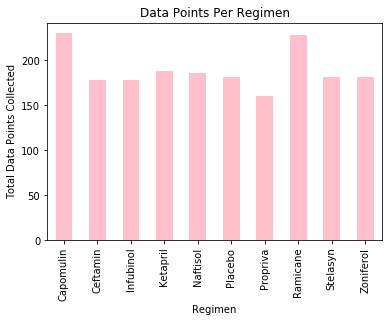

In [14]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
counts = regimen["Tumor Volume (mm3)"].count()
first_bar = counts.plot(kind='bar', color="pink", title = "Data Points Per Regimen")
first_bar.set_xlabel("Regimen")
first_bar.set_ylabel("Total Data Points Collected")


Text(0, 0.5, 'Total Data Points Collected')

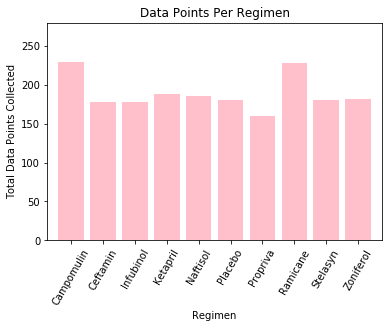

In [15]:
# Bar Plot using pyplot 
counts = regimen["Tumor Volume (mm3)"].count()
counts

y_axis = counts
x_axis = np.arange(len(y_axis))

plt.bar(x_axis, y_axis, color='pink', align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Campomulin", 
                            "Ceftamin", 
                            "Infubinol",
                            "Ketapril",
                            "Naftisol",
                            "Placebo",
                            "Propriva",
                            "Ramicane",
                            "Stelasyn",
                            "Zoniferol"],rotation = 60)

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+50)

plt.title("Data Points Per Regimen")
plt.xlabel("Regimen")
plt.ylabel("Total Data Points Collected")

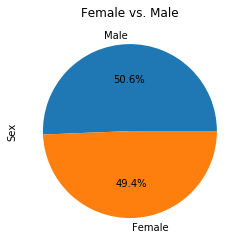

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = combined_df["Sex"].value_counts()
gender.plot(kind='pie', title = "Female vs. Male",autopct='%1.1f%%')
plt.show()

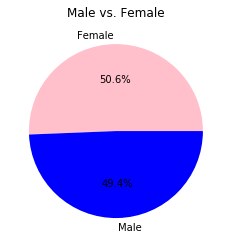

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = combined_df["Sex"].value_counts()

labels = ["Female", "Male"]
colors = ["pink", "blue"]
explode = (0, 0)

plt.pie(gender, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title("Male vs. Female")
plt.show()



In [18]:
# QUESTION FOR GRETEL: WHY NOT THESE GROUPS FOR MOST PROMISING
sorted_df = stat_summary_df.sort_values("Mean Tumor Volume")
sorted_df.head(4)

,Mean Tumor Volume,Median Tumor Volume,Std Dev Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,
Ramicane,40.216745,40.673236,4.846308,0.320955
Capomulin,40.675741,41.557809,4.994774,0.329346
Propriva,52.368318,50.909965,6.502160,0.514041
Ceftamin,52.591172,51.776157,6.268188,0.469821


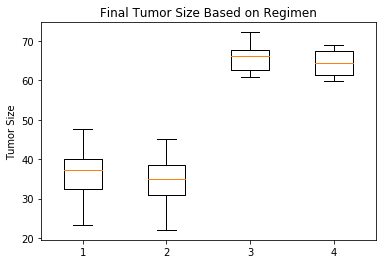

Values below 20.70456164999999 and above 51.83201549 could be outliers for Capomulin.
Values below 19.690480101250003 and above 49.79900043124999 could be outliers for Ramicane.
Values below 55.35777559500001 and above 75.08224443499999 could be outliers for Infubinol.
Values below 52.29350701999999 and above 76.66786758 could be outliers for Ceftamin.


In [29]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# All four box plots should be within the same figure. 
# https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py)
# Capomulin, Ramicane, Infubinol, and Ceftamin.

# QUESTION FOR GRETEL: IS THE SIZE CHANGE OR JUST LAST TIMEPOINT?
# ANOTHER VIEW BELOW 
final_capo = combined_df.loc[(combined_df["Timepoint"] == 45) & (combined_df["Drug Regimen"] == "Capomulin")] 
final_rami = combined_df.loc[(combined_df["Timepoint"] == 45) & (combined_df["Drug Regimen"] == "Ramicane")] 
final_infu = combined_df.loc[(combined_df["Timepoint"] == 45) & (combined_df["Drug Regimen"] == "Infubinol")] 
final_ceft = combined_df.loc[(combined_df["Timepoint"] == 45) & (combined_df["Drug Regimen"] == "Ceftamin")] 


A = final_capo["Tumor Volume (mm3)"]
B = final_rami["Tumor Volume (mm3)"]
C = final_infu["Tumor Volume (mm3)"]
D = final_ceft["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Size Based on Regimen")
ax1.set_ylabel("Tumor Size")
plt.boxplot([A,B,C,D])
plt.show()

quartiles = final_capo["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} and above {upper_bound} could be outliers for Capomulin.")

quartiles = final_rami["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} and above {upper_bound} could be outliers for Ramicane.")

quartiles = final_infu["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} and above {upper_bound} could be outliers for Infubinol.")

quartiles = final_ceft["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} and above {upper_bound} could be outliers for Ceftamin.")

In [20]:
# OR IS IT THIS WAY? 
start = combined_df.loc[(combined_df["Timepoint"] == 0) & (combined_df["Drug Regimen"] == "Ceftamin")] 
final = combined_df.loc[(combined_df["Timepoint"] == 45) & (combined_df["Drug Regimen"] == "Ceftamin")] 

start_finish = pd.merge(start, final, on="Mouse ID")
select = start_finish[["Mouse ID","Tumor Volume (mm3)_x","Tumor Volume (mm3)_y"]]

ceftamin = select.rename(columns={"Tumor Volume (mm3)_x":"Start Tumor Volume",
                                "Tumor Volume (mm3)_y":"End Tumor Volume"
                                  })

ceftamin["Ceftamin Tumor Change"] = ceftamin["Start Tumor Volume"] - ceftamin["End Tumor Volume"]
ceftamin


,Mouse ID,Start Tumor Volume,End Tumor Volume,Ceftamin Tumor Change
0,a275,45.0,62.999356,-17.999356
1,j296,45.0,61.849023,-16.849023
2,k210,45.0,68.923185,-23.923185
3,l471,45.0,67.748662,-22.748662
4,l661,45.0,59.851956,-14.851956
5,l733,45.0,64.299830,-19.299830
6,o287,45.0,59.741901,-14.741901
7,p438,45.0,61.433892,-16.433892
8,w151,45.0,67.527482,-22.527482
9,x581,45.0,64.634949,-19.634949


In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# mouse number l509
mouse = combined_df.loc[(combined_df["Mouse ID"] == "l509") & (combined_df["Drug Regimen"] == "Capomulin")] 
mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207289,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


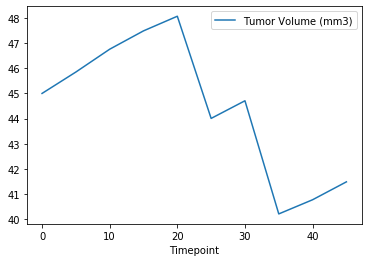

In [22]:
mouse.plot(kind='line',x='Timepoint',y='Tumor Volume (mm3)')
plt.show()

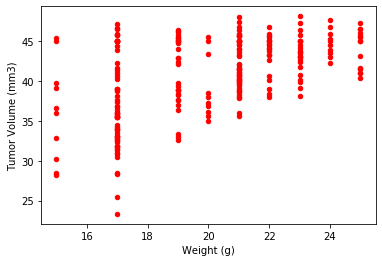

In [23]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
drugs = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"] 
drugs.plot(kind='scatter',x='Weight (g)',y="Tumor Volume (mm3)",color='red')
plt.show()

The r-squared is: 0.2763600223455911


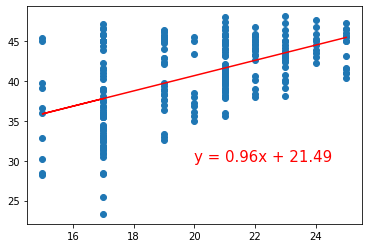

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = drugs["Weight (g)"]
y_values = drugs["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

In [25]:
#  Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.